# ***Importing the libraries***

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
#from sklearn import datasets
#from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# ***Loading the data***

In [2]:
df = pd.read_csv('/content/traindata.csv')
test = pd.read_csv('/content/testdata.csv')
#test.head()
X = df[df.columns[:-1]]
y = df['Class']
#y.head()

# ***Converting string to int***

In [3]:
#Since the 3 cols 'protocol_type','service','flag' are string we convert them to int so we can deal with them, by the function encoder

#converting in training data

for i in ['protocol_type','service','flag']:
  le = preprocessing.LabelEncoder()
  le.fit(X[i])
  X[i] = le.transform(X[i])
X.head()

#converting in testing data
for i in ['protocol_type','service','flag']:
  le = preprocessing.LabelEncoder()
  le.fit(test[i])
  test[i] = le.transform(test[i])

test.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,4,1,43,9,30,93,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,232,0.91,0.04,0.00,0.00,0.0,0.0,0.0,0.0,16
1,1,0,1,45,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,240,5,1.0,1.0,0.0,0.0,0.02,0.07,0.0,255,5,0.02,0.08,0.00,0.00,1.0,1.0,0.0,0.0,21
2,2,0,2,45,9,52,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,17
3,3,0,1,22,9,367,588,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,8,255,1.00,0.00,0.12,0.06,0.0,0.0,0.0,0.0,21
4,4,0,0,14,9,1008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,311,311,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,18


# ***Feature selection***

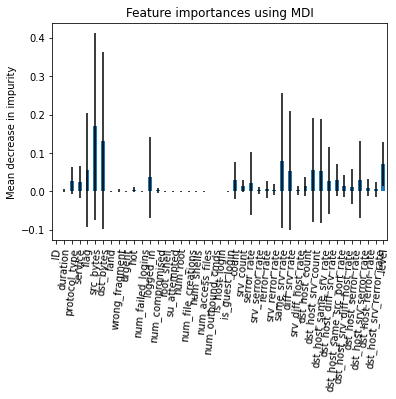

In [4]:
feature_names = [X.columns]
feature_names = [y for x in feature_names for y in x]
feature_names

## Feature importance visualization
clf= RandomForestClassifier(random_state=5555, n_jobs=-1, n_estimators=100 )
clf.fit(X, y)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
X.apply(lambda col: col.drop_duplicates().reset_index(drop=True))
forest_importances = pd.Series(importances, index= list(feature_names))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, rot=85)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['font.size'] = 15
plt.rcParams = plt.rcParamsOrig


# ***Dropping the features according to feature selection***

In [5]:
remove_from_traing = ['ID','duration','land','wrong_fragment','urgent','hot','num_failed_logins','num_compromised'	,'root_shell'	
,'su_attempted'	,'num_root'	,'num_file_creations'	,'num_shells'	,'num_access_files','num_outbound_cmds'	
,'is_host_login'	,'is_guest_login','srv_diff_host_rate','dst_host_count','dst_host_rerror_rate'	,'dst_host_srv_rerror_rate',
'srv_serror_rate'	 ,'rerror_rate'	,'srv_rerror_rate']


X = X.drop(remove_from_traing,axis=1) 
X.head()


,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,level
0,1,22,9,295,2584,1,2,3,0.0,1.0,0.0,255,1.00,0.00,0.01,0.03,0.0,0.0,21
1,1,22,9,312,839,1,5,7,0.0,1.0,0.0,255,1.00,0.00,0.00,0.02,0.0,0.0,21
2,1,18,9,1225,2451,1,1,1,0.0,1.0,0.0,116,0.45,0.02,0.00,0.00,0.0,0.0,11
3,1,22,9,293,296,1,3,4,0.0,1.0,0.0,255,1.00,0.00,0.00,0.02,0.0,0.0,21
4,1,1,1,0,0,0,2,1,0.0,0.5,1.0,1,0.01,0.03,0.01,0.00,0.0,0.0,11


# ***Changing the col that are string to int in test.csv***

In [6]:
test_removes = ['ID','duration','land','wrong_fragment','urgent','hot','num_failed_logins','num_compromised'	,'root_shell'	
,'su_attempted'	,'num_root'	,'num_file_creations'	,'num_shells'	,'num_access_files','num_outbound_cmds'	
,'is_host_login'	,'is_guest_login','srv_diff_host_rate','dst_host_count','dst_host_rerror_rate'	,'dst_host_srv_rerror_rate',
'srv_serror_rate'	 ,'rerror_rate'	,'srv_rerror_rate']

test.head()

test = test.drop(test_removes,axis=1)
 

# ***Grid Search to get the best parameters***

In [7]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
params = { 'max_depth': [2,3,5,10,20], 'min_samples_leaf': [5,10,20,50,100,200], 'splitter': ['best', 'random'] }
from sklearn.model_selection import GridSearchCV
#Instantiate the grid search model
grid_search = GridSearchCV(estimator=decision_tree, param_grid=params, cv = 4, n_jobs=-1, verbose=3, scoring="f1")
grid_search.fit(X, y)
grid_search.best_score_
decision_tree_best = grid_search.best_estimator_
decision_tree_best

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.5s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# ***Results from grid search***

In [8]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 10, 'min_samples_leaf': 5, 'splitter': 'best'}
0.9958639860744296


# ***Decision Tree Classifier***

In [23]:
decision_tree = DecisionTreeClassifier(random_state=42, min_samples_split=5, max_depth=10, max_leaf_nodes=4, min_samples_leaf=5, splitter='best')
decision_tree = decision_tree.fit(X,y)


In [24]:
pred_for_desicion_tree = decision_tree.predict(test)
pred_for_desicion_tree


array([1, 1, 0, ..., 1, 0, 0])

# ***Saving the results in CSV file***

In [25]:
df = pd.DataFrame({'ID': range(0,len(pred_for_desicion_tree)),
                   'Class': pred_for_desicion_tree})
df.to_csv(index=False)
'name,mask,weapon\nRaphael,red,sai\nDonatello,purple,bo staff\n'
compression_opts = dict(method='zip',
                        archive_name='ouput.csv')  
df.to_csv('output.csv')  
